In [ ]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline

In [ ]:
data = pd.read_csv("income_evaluation.csv")

In [ ]:
data.head(5)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [ ]:
data.isna().sum()

age                0
 workclass         0
 fnlwgt            0
 education         0
 education-num     0
 marital-status    0
 occupation        0
 relationship      0
 race              0
 sex               0
 capital-gain      0
 capital-loss      0
 hours-per-week    0
 native-country    0
 income            0
dtype: int64

In [ ]:
data.shape

(32561, 15)

In [ ]:
data.columns

Index(['age', ' workclass', ' fnlwgt', ' education', ' education-num',
       ' marital-status', ' occupation', ' relationship', ' race', ' sex',
       ' capital-gain', ' capital-loss', ' hours-per-week', ' native-country',
       ' income'],
      dtype='object')

In [ ]:
# Modifying the name of the columns in proper format 
col_names = ['age', ' workclass', ' fnlwgt', ' education', ' education_num',
       ' marital_status', ' occupation', ' relationship', ' race', ' sex',
       ' capital_gain', ' capital_loss', ' hours_per_week', ' native_country',
       ' income']
data.columns = col_names       

In [ ]:
data.columns

Index(['age', ' workclass', ' fnlwgt', ' education', ' education_num',
       ' marital_status', ' occupation', ' relationship', ' race', ' sex',
       ' capital_gain', ' capital_loss', ' hours_per_week', ' native_country',
       ' income'],
      dtype='object')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              32561 non-null  int64 
 1    workclass       32561 non-null  object
 2    fnlwgt          32561 non-null  int64 
 3    education       32561 non-null  object
 4    education_num   32561 non-null  int64 
 5    marital_status  32561 non-null  object
 6    occupation      32561 non-null  object
 7    relationship    32561 non-null  object
 8    race            32561 non-null  object
 9    sex             32561 non-null  object
 10   capital_gain    32561 non-null  int64 
 11   capital_loss    32561 non-null  int64 
 12   hours_per_week  32561 non-null  int64 
 13   native_country  32561 non-null  object
 14   income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [ ]:
# to know about the datatype of each columns 
data.dtypes

age                 int64
 workclass         object
 fnlwgt             int64
 education         object
 education_num      int64
 marital_status    object
 occupation        object
 relationship      object
 race              object
 sex               object
 capital_gain       int64
 capital_loss       int64
 hours_per_week     int64
 native_country    object
 income            object
dtype: object

In [ ]:
def initial_eda(df):
  if isinstance(df,pd.DataFrame):
    total_na = df.isna().sum().sum()
    print("Dimensions : %d rows, %d columns" %(df.shape[0],df.shape[1]))
    print("Total NA Values: %d" %(total_na))
    print("%38s %10s     %10s %10s" % ("Column Name", "Data Type", "#Distinct", "NA Values"))
    col_name = df.columns
    dtyp = df.dtypes
    uniq = df.nunique()
    na_val = df.isna().sum()
    for i in range(len(df.columns)):
        print("%38s %10s   %10s %10s" % (col_name[i], dtyp[i], uniq[i], na_val[i]))

In [ ]:
initial_eda(data)

Dimensions : 32561 rows, 15 columns
Total NA Values: 0
                           Column Name  Data Type      #Distinct  NA Values
                                   age      int64           73          0
                             workclass     object            9          0
                                fnlwgt      int64        21648          0
                             education     object           16          0
                         education_num      int64           16          0
                        marital_status     object            7          0
                            occupation     object           15          0
                          relationship     object            6          0
                                  race     object            5          0
                                   sex     object            2          0
                          capital_gain      int64          119          0
                          capital_loss      int64      

### Categorical Variable

In [ ]:
d_cat = data.select_dtypes(include ='object')
d_cat.columns.value_counts().sum()
len(d_cat.columns)

9

In [ ]:
categorical = [x for x in data.columns if  data[x].dtype == 'O']
print("The categorical Variables are :",categorical)

The categorical Variables are : [' workclass', ' education', ' marital_status', ' occupation', ' relationship', ' race', ' sex', ' native_country', ' income']


In [ ]:
data[categorical].head()

,workclass,education,marital_status,occupation,relationship,race,sex,native_country,income
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K


In [ ]:
# Frequency distribution of categorcial variables 
for var in categorical:
  d = data[var].value_counts()
  d1 = pd.DataFrame(d)
  print(d1)

                    workclass
 Private                22696
 Self-emp-not-inc        2541
 Local-gov               2093
 ?                       1836
 State-gov               1298
 Self-emp-inc            1116
 Federal-gov              960
 Without-pay               14
 Never-worked               7
                education
 HS-grad            10501
 Some-college        7291
 Bachelors           5355
 Masters             1723
 Assoc-voc           1382
 11th                1175
 Assoc-acdm          1067
 10th                 933
 7th-8th              646
 Prof-school          576
 9th                  514
 12th                 433
 Doctorate            413
 5th-6th              333
 1st-4th              168
 Preschool             51
                         marital_status
 Married-civ-spouse               14976
 Never-married                    10683
 Divorced                          4443
 Separated                         1025
 Widowed                            993
 Married-spouse-ab

In [ ]:
# Percentage of frequency distribution 
for var in categorical:
  print("\n\n",var)
  d = data[var].value_counts()/data.shape[0]
  d1 = pd.DataFrame(d)
  print(d1)



  workclass
                    workclass
 Private             0.697030
 Self-emp-not-inc    0.078038
 Local-gov           0.064279
 ?                   0.056386
 State-gov           0.039864
 Self-emp-inc        0.034274
 Federal-gov         0.029483
 Without-pay         0.000430
 Never-worked        0.000215


  education
                education
 HS-grad         0.322502
 Some-college    0.223918
 Bachelors       0.164461
 Masters         0.052916
 Assoc-voc       0.042443
 11th            0.036086
 Assoc-acdm      0.032769
 10th            0.028654
 7th-8th         0.019840
 Prof-school     0.017690
 9th             0.015786
 12th            0.013298
 Doctorate       0.012684
 5th-6th         0.010227
 1st-4th         0.005160
 Preschool       0.001566


  marital_status
                         marital_status
 Married-civ-spouse            0.459937
 Never-married                 0.328092
 Divorced                      0.136452
 Separated                     0.031479
 Widowed   

##### Since there are columns with '?' as entry inplace of missing values ,so we are going to replace them with 'NAN'.

In [ ]:
data.replace(' ?',np.NaN,inplace = True)

In [ ]:
# After replacing the '?' with np.NaN 
missing_val_cat = [' workclass',' occupation',' native_country']
for i in missing_val_cat:
    print(i,"\n\n",data[i].value_counts(),"\n\n\n")

 workclass 

  Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name:  workclass, dtype: int64 



 occupation 

  Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name:  occupation, dtype: int64 



 native_country 

  United-States                 29170
 Mexico                          643
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                      

#### Visualize workclass variable

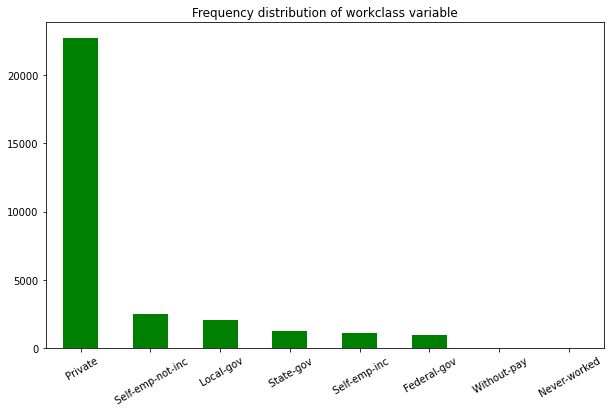

In [ ]:
f,ax = plt.subplots(figsize = (10,6))
ax = data[' workclass'].value_counts().plot(kind = 'bar',color = 'green')
ax.set_title("Frequency distribution of workclass variable")
ax.set_xticklabels(data[' workclass'].value_counts().index, rotation=30)
plt.show()

##### Visualize workclass variable wrt income variable

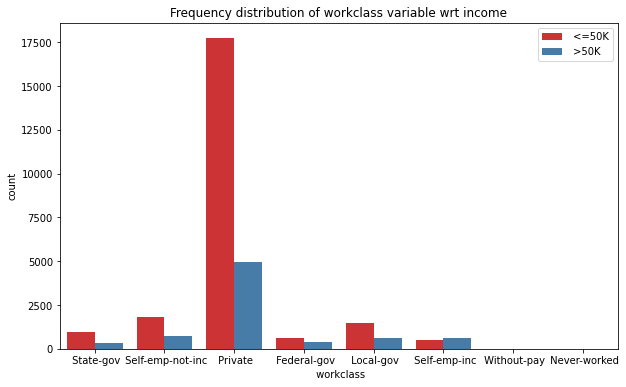

In [ ]:
f,ax = plt.subplots(figsize = (10,6))
ax = sns.countplot(x=' workclass',hue = ' income',data = data,palette ='Set1')
ax.set_title("Frequency distribution of workclass variable wrt income")
ax.legend(loc='upper right')
plt.show()

###### Interpretation
We can see that there are more male workers than female workers in all the working category.

The trend is more appealing in Private sector.


In [ ]:
data[' occupation'].nunique()

14

In [ ]:
data[' occupation'].unique()

array([' Adm-clerical', ' Exec-managerial', ' Handlers-cleaners',
       ' Prof-specialty', ' Other-service', ' Sales', ' Craft-repair',
       ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
       ' Tech-support', nan, ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

In [ ]:
data[' occupation'].value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name:  occupation, dtype: int64

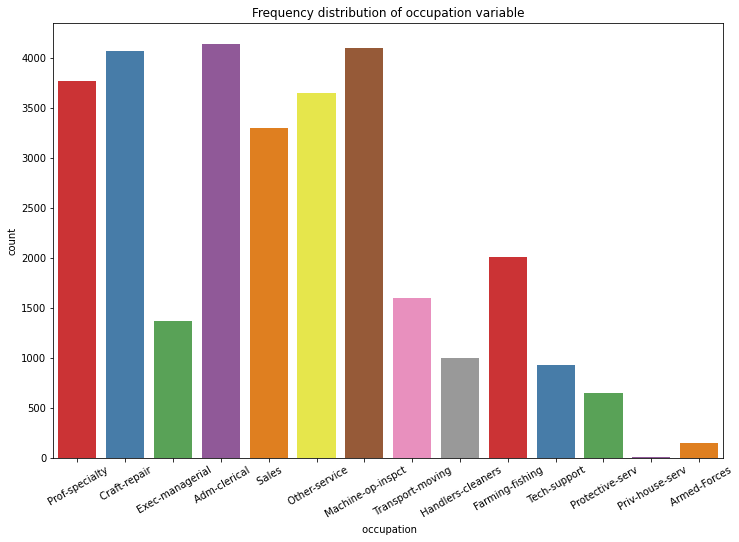

In [ ]:
f, ax = plt.subplots(figsize=(12, 8))
ax = sns.countplot(x=" occupation", data=data, palette="Set1")
ax.set_title("Frequency distribution of occupation variable")
ax.set_xticklabels(data[' occupation'].value_counts().index, rotation=30)
plt.show()

In [ ]:
# check the number of unique labels
data[' native_country'].nunique()

41

In [ ]:
data[' native_country'].unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', nan, ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

In [ ]:
data[' native_country'].value_counts()

 United-States                 29170
 Mexico                          643
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 France                           29
 

In [ ]:
# again check the frequency distribution of values

data[' native_country'].value_counts()

 United-States                 29170
 Mexico                          643
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 France                           29
 

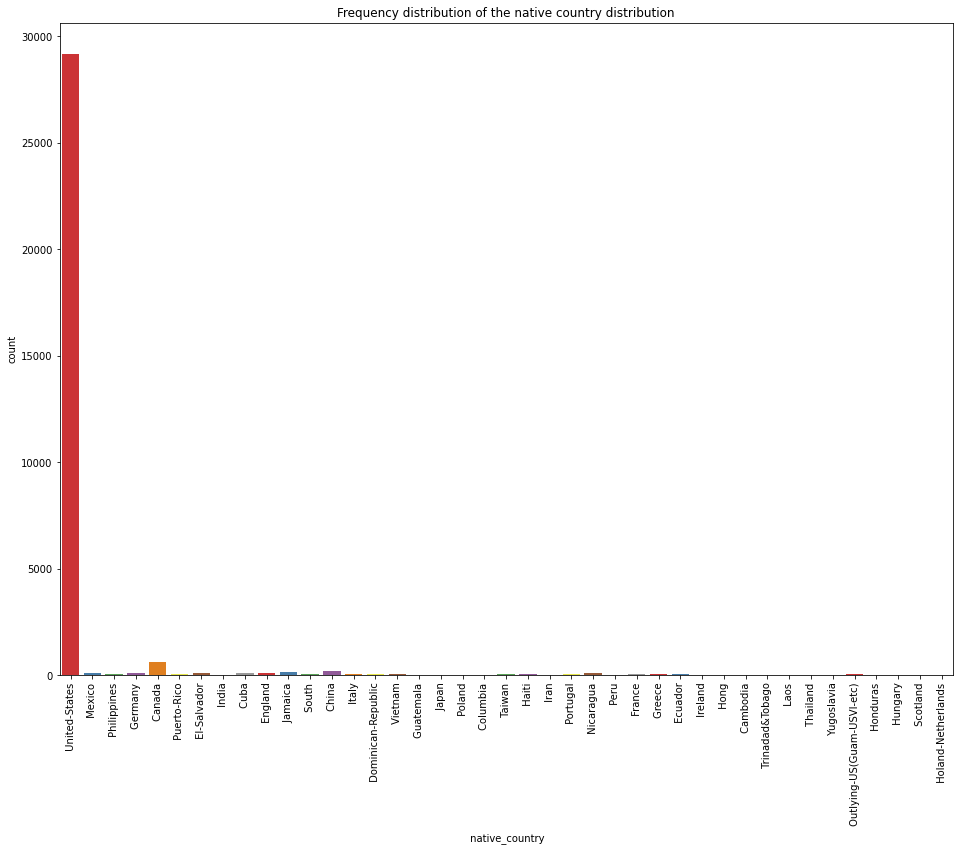

In [ ]:
f,ax = plt.subplots(figsize=(16,12))
ax = sns.countplot(x=' native_country',data = data,palette="Set1")
ax.set_title("Frequency distribution of the native country distribution")
ax.set_xticklabels(data[' native_country'].value_counts().index,rotation=90)
plt.show()

##### observation:

*   United States dominates among the native variables.




In [ ]:
# To check the missing value in categorical variables
data[categorical].isna().sum()

 workclass         1836
 education            0
 marital_status       0
 occupation        1843
 relationship         0
 race                 0
 sex                  0
 native_country     583
 income               0
dtype: int64

In [ ]:
data[' income'].value_counts()

 <=50K    24720
 >50K      7841
Name:  income, dtype: int64

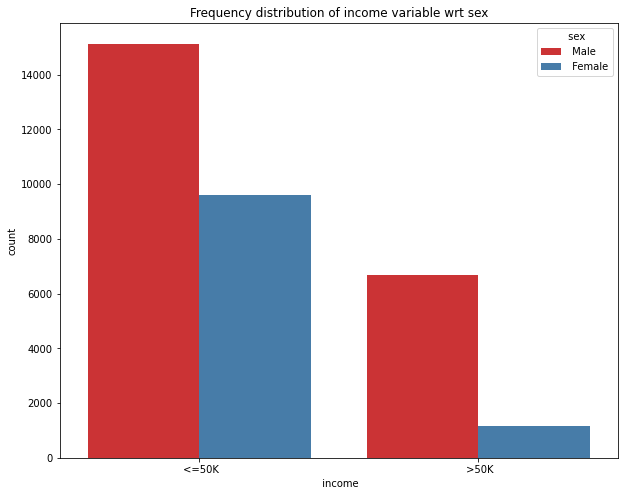

In [ ]:
f, ax = plt.subplots(figsize=(10, 8))
ax = sns.countplot(x=" income", hue=" sex", data=data, palette="Set1")
ax.set_title("Frequency distribution of income variable wrt sex")
plt.show()

##### Interpretation
We can see that males make more money than females in both the income categories.

#### income distribution wrt race 


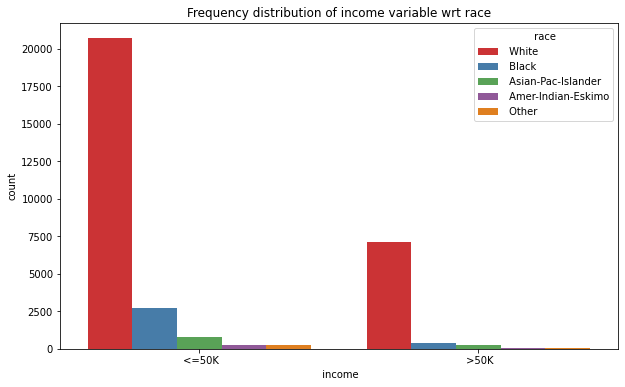

In [ ]:
f,ax = plt.subplots(figsize = (10, 6))
ax = sns.countplot(x=' income',hue= ' race',data=data,palette = "Set1")
ax.set_title("Frequency distribution of income variable wrt race")
plt.show()

#### Observation
- White people make more money in both the categories 


#### Explore Continuous variable

###### Find Numerical Variable

In [ ]:
numerical = data.select_dtypes(include='int').columns
numerical = ['age', ' fnlwgt', ' education_num', ' capital_gain', ' capital_loss',
       ' hours_per_week']
print(f"There are total {len(numerical)} numerical columns.")
print(f"The numerical columns are {numerical}")

There are total 6 numerical columns.
The numerical columns are ['age', ' fnlwgt', ' education_num', ' capital_gain', ' capital_loss', ' hours_per_week']


##### Preview the numerical variables


In [ ]:
data[numerical].head(2)


,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
0,39,77516,13,2174,0,40
1,50,83311,13,0,0,13


In [ ]:
data[numerical].isnull().sum().sum()

0

#### Explore 'age' variable

In [ ]:
data['age'].nunique()

73

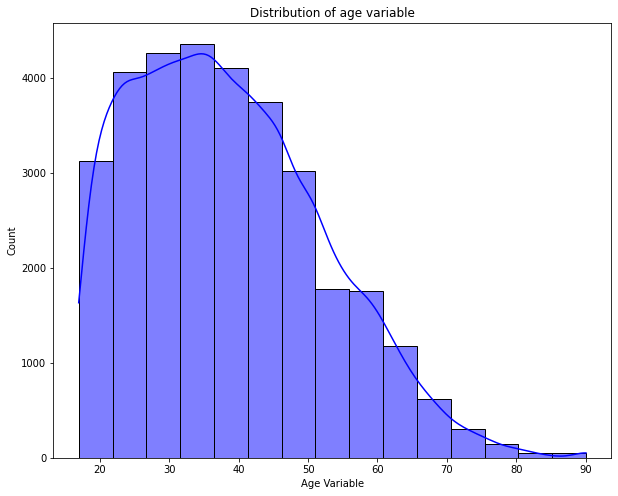

In [ ]:
f,ax = plt.subplots(figsize=(10,8))
x = data['age']
x= pd.Series(x,name='Age Variable')
ax = sns.histplot(x,bins=15,color='blue',kde=True)
ax.set_title("Distribution of age variable")
plt.show()

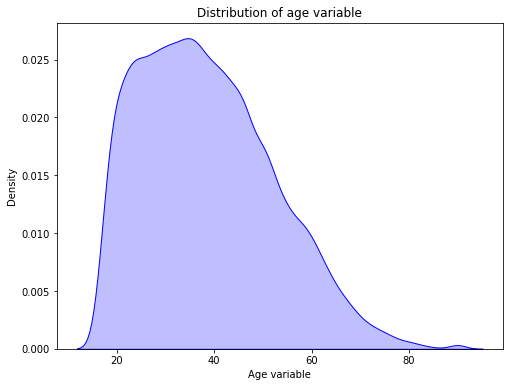

In [ ]:
f, ax = plt.subplots(figsize=(8,6))
x = data['age']
x = pd.Series(x, name="Age variable")
ax = sns.kdeplot(x, shade=True, color='blue')
ax.set_title("Distribution of age variable")
plt.show()

##### observation
- The age is slightly skewed

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


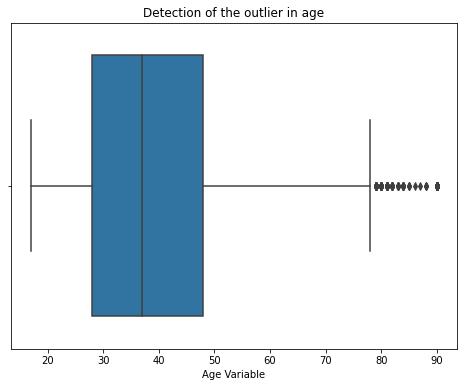

In [ ]:
# Detect outliers in age variable with boxplot
f,ax = plt.subplots(figsize = (8,6))
x = data['age']
x = pd.Series(x,name="Age Variable")
ax= sns.boxplot(x)
ax.set_title("Detection of the outlier in age")
plt.show()

#### Relationship between age and income variables 

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


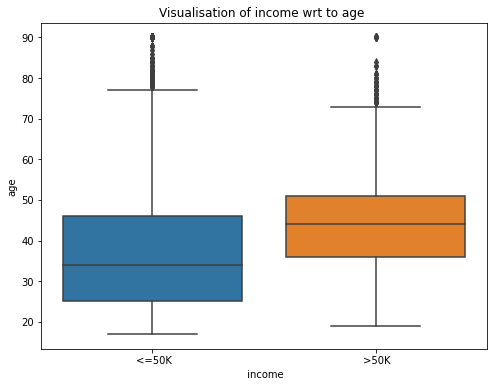

In [ ]:
f,ax= plt.subplots(figsize=(8,6))
x = data[' income']
y = data['age']
ax.set_title('Visualisation of income wrt to age ')
sns.boxplot(x,y,data=data)
plt.show()

#### observation
- As expected, younger people make less money as compared to senior people.

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


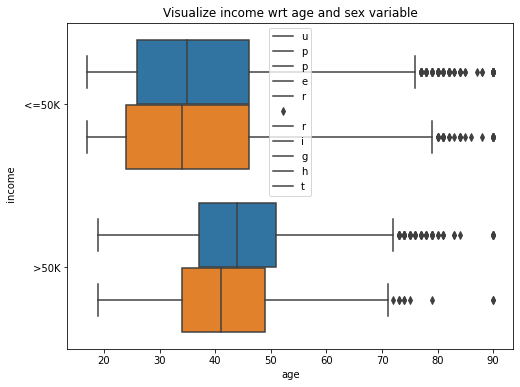

In [ ]:
# Visualize income wrt age and sex variable
f,ax = plt.subplots(figsize=(8,6))
x = data['age']
y = data[' income']
ax.set_title("Visualize income wrt age and sex variable")
sns.boxplot(x,y,hue = ' sex',data=data)
ax.legend("upper right")
plt.show()

<Figure size 576x432 with 0 Axes>

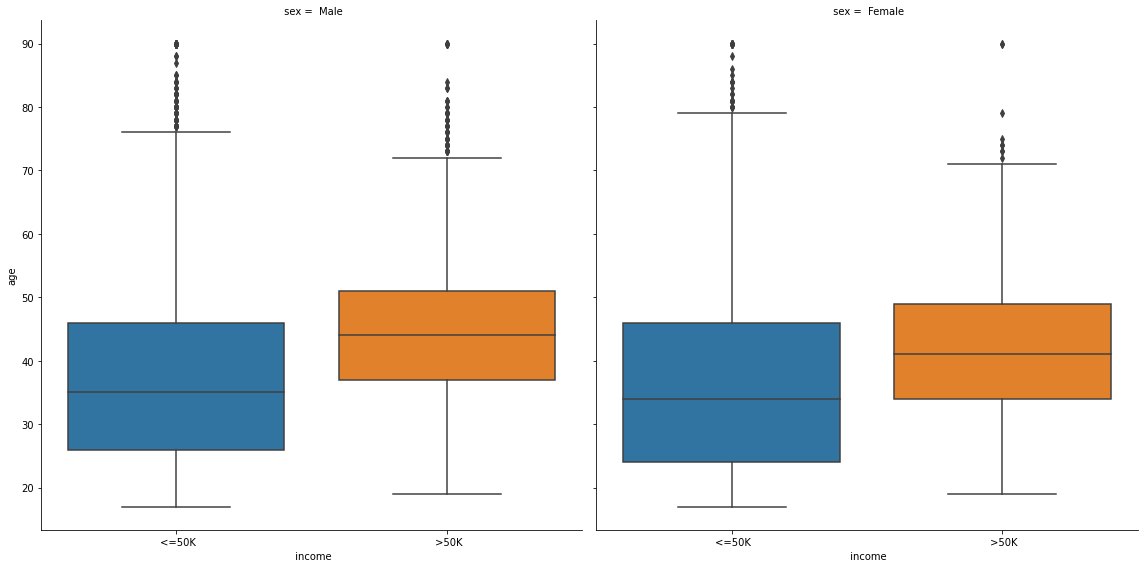

In [ ]:
plt.figure(figsize=(8,6))
ax = sns.catplot(x=" income", y="age", col=" sex", data=data, kind="box", height=8, aspect=1)
plt.show()

##### observation 
- senior people make more money than the younger one 


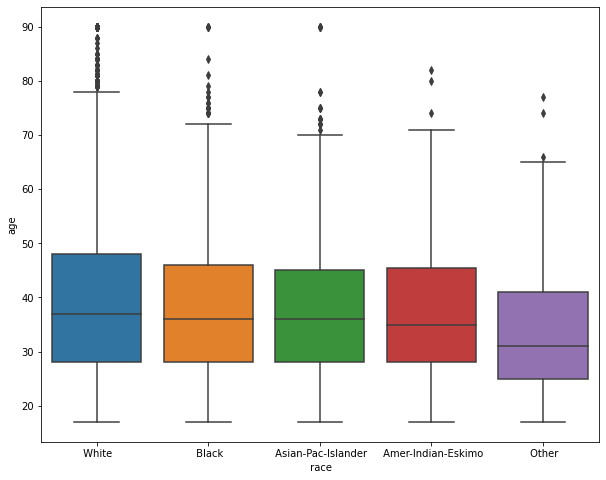

In [ ]:
# Visualize relationship between race and age
f,ax= plt.subplots(figsize=(10,8))
sns.boxplot(x=' race',y='age',data=data)
plt.show()

#### observation  
- white people are older than the others in the group 

### Find out the correlations

In [ ]:

data.corr().style.format("{:.4}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)


,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
age,1.0,-0.07665,0.03653,0.07767,0.05777,0.06876
fnlwgt,-0.07665,1.0,-0.04319,0.0004319,-0.01025,-0.01877
education_num,0.03653,-0.04319,1.0,0.1226,0.07992,0.1481
capital_gain,0.07767,0.0004319,0.1226,1.0,-0.03162,0.07841
capital_loss,0.05777,-0.01025,0.07992,-0.03162,1.0,0.05426
hours_per_week,0.06876,-0.01877,0.1481,0.07841,0.05426,1.0


#### observation
- There is no strong correlation between variables 

### Plot pairwise relationships in dataset

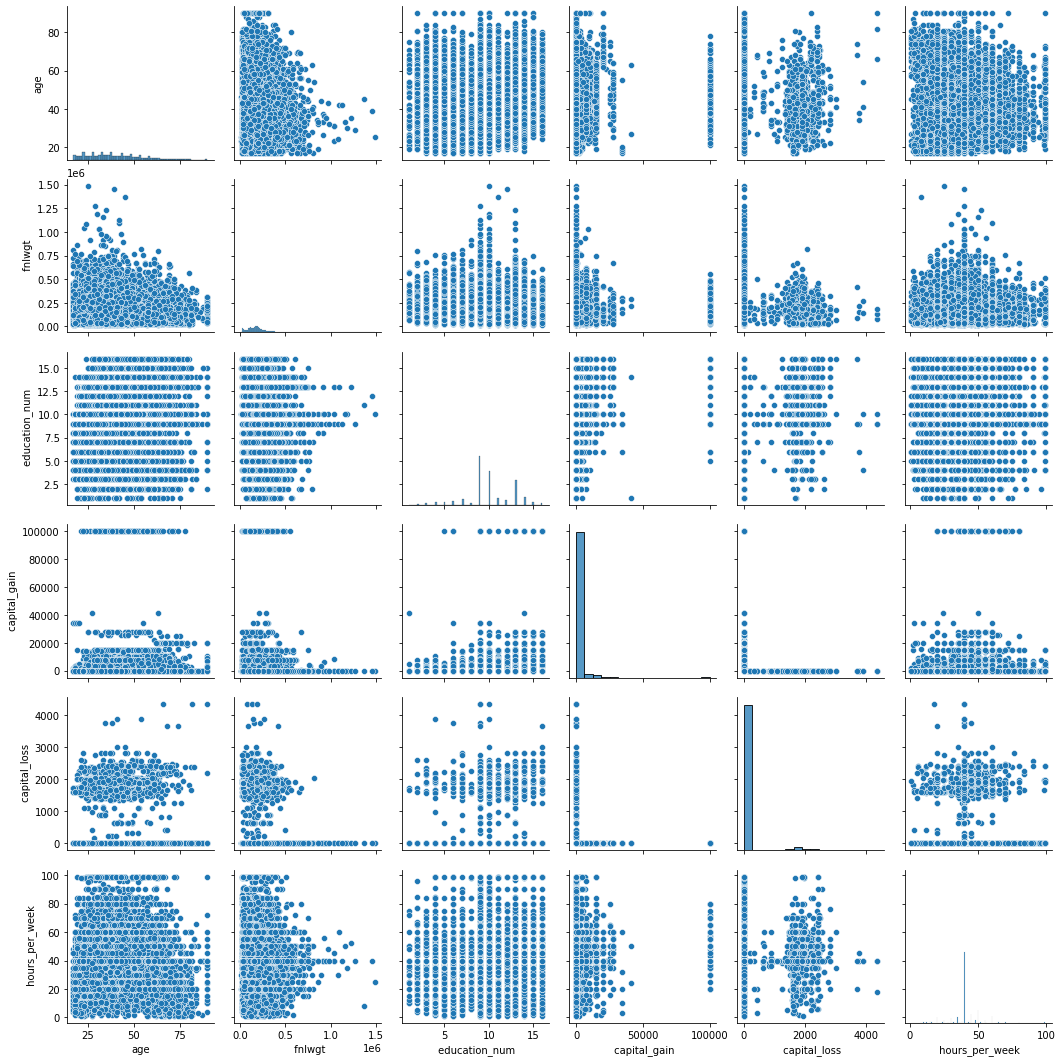

In [ ]:
sns.pairplot(data)
plt.show()

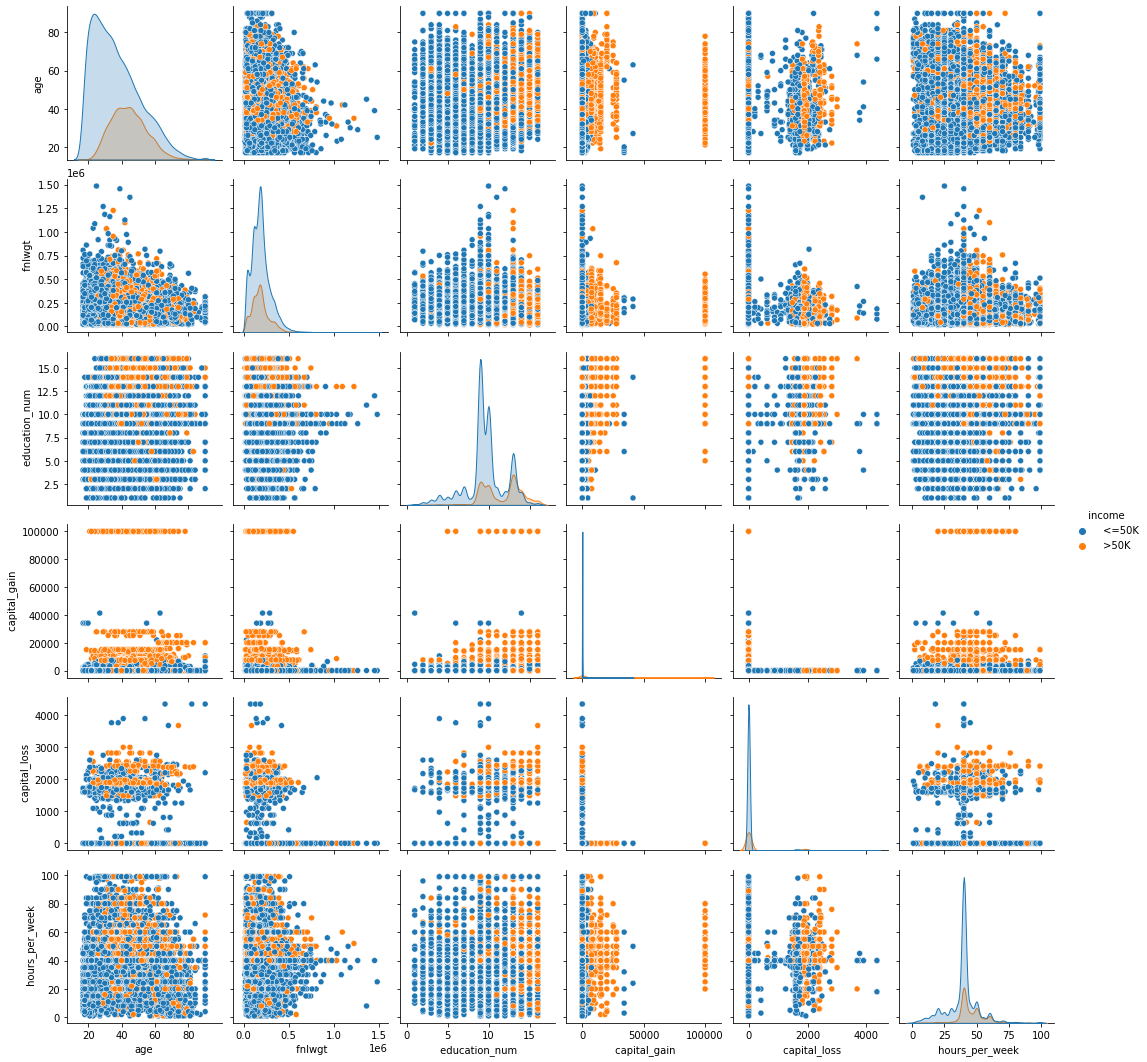

In [ ]:
sns.pairplot(data,hue=' income')
plt.show()

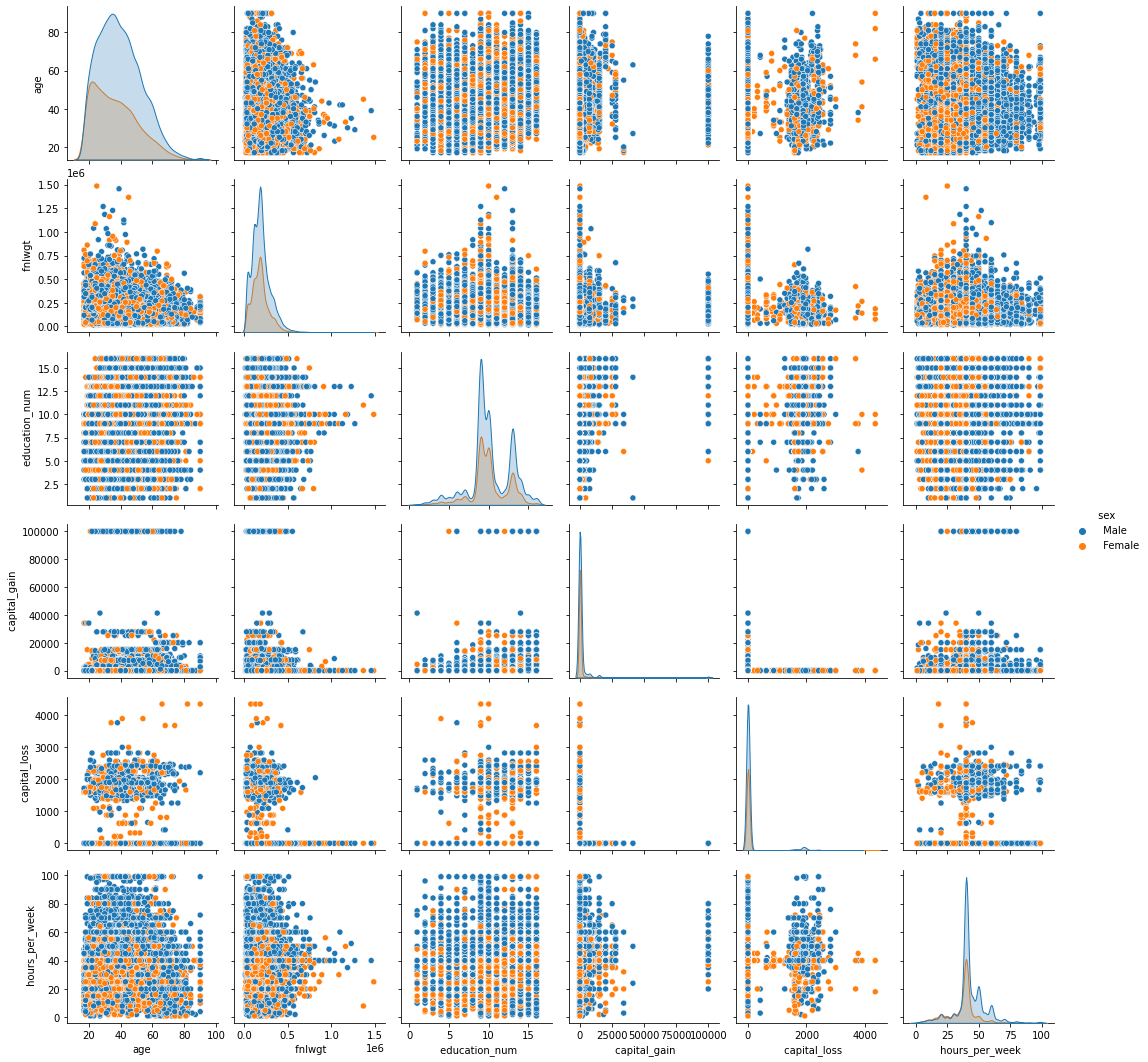

In [ ]:
sns.pairplot(data,hue=' sex')
plt.show()

## Feature vector and target variable 

In [ ]:
X= data.drop(' income',axis=1)
y = data.iloc[:,-1]

### Split data into separate training and test set 


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [ ]:
X_train.shape,X_test.shape

((22792, 14), (9769, 14))

#### Feature Engineering 

In [ ]:
num = data.select_dtypes(include='int').columns
cat = data.select_dtypes(include='O').columns
num

Index(['age', ' fnlwgt', ' education_num', ' capital_gain', ' capital_loss',
       ' hours_per_week'],
      dtype='object')

In [ ]:
numerical = ['age', ' fnlwgt', ' education_num', ' capital_gain', ' capital_loss',
       ' hours_per_week']
categorical = [' workclass', ' education', ' marital_status', ' occupation',
       ' relationship', ' race', ' sex', ' native_country']       

#### Engineering missing values in categorical variables


In [ ]:
# print percentage of missing values in the categorical variables in training set

X_train[categorical].isnull().mean()

 workclass         0.055985
 education         0.000000
 marital_status    0.000000
 occupation        0.056072
 relationship      0.000000
 race              0.000000
 sex               0.000000
 native_country    0.018164
dtype: float64

In [ ]:
# print categorical variables with missing data

for col in categorical:
    if X_train[col].isnull().mean()>0:
        print(col, (X_train[col].isnull().mean()))

 workclass 0.055984555984555984
 occupation 0.05607230607230607
 native_country 0.018164268164268166


In [ ]:
# impute missing categorical variables with most frequent value

for df2 in [X_train, X_test]:
    df2[' workclass'].fillna(X_train[' workclass'].mode()[0], inplace=True)
    df2[' occupation'].fillna(X_train[' occupation'].mode()[0], inplace=True)
    df2[' native_country'].fillna(X_train[' native_country'].mode()[0], inplace=True)    

In [ ]:
# check missing values in categorical variables in X_train

X_train[categorical].isnull().sum()

 workclass         0
 education         0
 marital_status    0
 occupation        0
 relationship      0
 race              0
 sex               0
 native_country    0
dtype: int64

In [ ]:
# check missing values in categorical variables in X_test

X_test[categorical].isnull().sum()

 workclass         0
 education         0
 marital_status    0
 occupation        0
 relationship      0
 race              0
 sex               0
 native_country    0
dtype: int64

In [ ]:
# check missing values in X_train

X_train.isnull().sum()

age                0
 workclass         0
 fnlwgt            0
 education         0
 education_num     0
 marital_status    0
 occupation        0
 relationship      0
 race              0
 sex               0
 capital_gain      0
 capital_loss      0
 hours_per_week    0
 native_country    0
dtype: int64

In [ ]:
# check missing values in X_test

X_test.isnull().sum()

age                0
 workclass         0
 fnlwgt            0
 education         0
 education_num     0
 marital_status    0
 occupation        0
 relationship      0
 race              0
 sex               0
 capital_gain      0
 capital_loss      0
 hours_per_week    0
 native_country    0
dtype: int64

##### Observation
- There are no missing value in the X_train , X_test 

In [ ]:
# Encode categorical variables
! pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.2/81.2 KB 3.2 MB/s eta 0:00:00


In [ ]:
# encode categorical variables with one-hot encoding
import category_encoders as ce

encoder = ce.OneHotEncoder(cols=categorical)

X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

In [ ]:
X_train.head()

,age,workclass_1,workclass_2,workclass_3,workclass_4,workclass_5,workclass_6,workclass_7,workclass_8,fnlwgt,...,native_country_32,native_country_33,native_country_34,native_country_35,native_country_36,native_country_37,native_country_38,native_country_39,native_country_40,native_country_41
32098,45,1,0,0,0,0,0,0,0,170871,...,0,0,0,0,0,0,0,0,0,0
25206,47,0,1,0,0,0,0,0,0,108890,...,0,0,0,0,0,0,0,0,0,0
23491,48,1,0,0,0,0,0,0,0,187505,...,0,0,0,0,0,0,0,0,0,0
12367,29,1,0,0,0,0,0,0,0,145592,...,0,0,0,0,0,0,0,0,0,0
7054,23,1,0,0,0,0,0,0,0,203003,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
X_train.shape

(22792, 105)

#### Feature Scaling

In [ ]:
cols = X_train.columns

In [ ]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

In [ ]:
X_train = pd.DataFrame(X_train, columns=[cols])
X_test = pd.DataFrame(X_test,columns=[cols])

### Random Forest Classifier model with default parameters 

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rcf = RandomForestClassifier(random_state = 0 )
rcf.fit(X_train,y_train)
y_pred = rcf.predict(X_test)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


In [ ]:
from sklearn.metrics import accuracy_score
print('Model accuracy score with 10 decision-trees : {0:0.4f}'.format(accuracy_score(y_test,y_pred)))

Model accuracy score with 10 decision-trees : 0.8521


##### obs:
- Here, I have build the Random Forest Classifier model with default parameter of n_estimators = 10. So, I have used 10 decision-trees to build the model. Now, I will increase the number of decision-trees and see its effect on accuracy

### Random Forest Classifier model with 100 Decision Trees 

In [ ]:
rcf_100 = RandomForestClassifier(n_estimators = 100,random_state = 0)
rcf_100.fit(X_train,y_train)
y_pred_100 = rcf_100.predict(X_test)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


In [ ]:
print('Model accuracy score with 10 decision-trees : {0:0.4f}'.format(accuracy_score(y_test,y_pred_100)))

Model accuracy score with 10 decision-trees : 0.8521


### Find important features with Random Forest model ¶

In [ ]:
clf = RandomForestClassifier(random_state=0,n_estimators= 100)
clf.fit(X_train,y_train)


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


RandomForestClassifier(random_state=0)

In [ ]:
feature_scores = pd.Series(clf.feature_importances_, index=X_train.columns).sort_values(ascending=False)
feature_scores

 fnlwgt               0.159772
age                   0.149074
 capital_gain         0.091299
 hours_per_week       0.086339
 education_num        0.065130
                        ...   
 native_country_16    0.000028
 occupation_14        0.000015
 native_country_35    0.000009
 workclass_8          0.000008
 native_country_41    0.000000
Length: 105, dtype: float64

### Visualize feature scores of the features 


In [ ]:
data = pd.concat([X_train, X_test], axis=0)
data.shape

(32561, 105)

In [ ]:
def plot_feature_importance(importance,names,model_type):

#Create arrays from feature importance and feature names
    feature_importance = np.array(importance)
    feature_names = np.array(names)

    #Create a DataFrame using a Dictionary
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)

    #Sort the DataFrame in order decreasing feature importance
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

    #Define size of bar plot
    plt.figure(figsize=(30,24))
    #Plot Searborn bar chart
    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
    #Add chart labels
    plt.title(model_type + 'FEATURE IMPORTANCE')
    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')

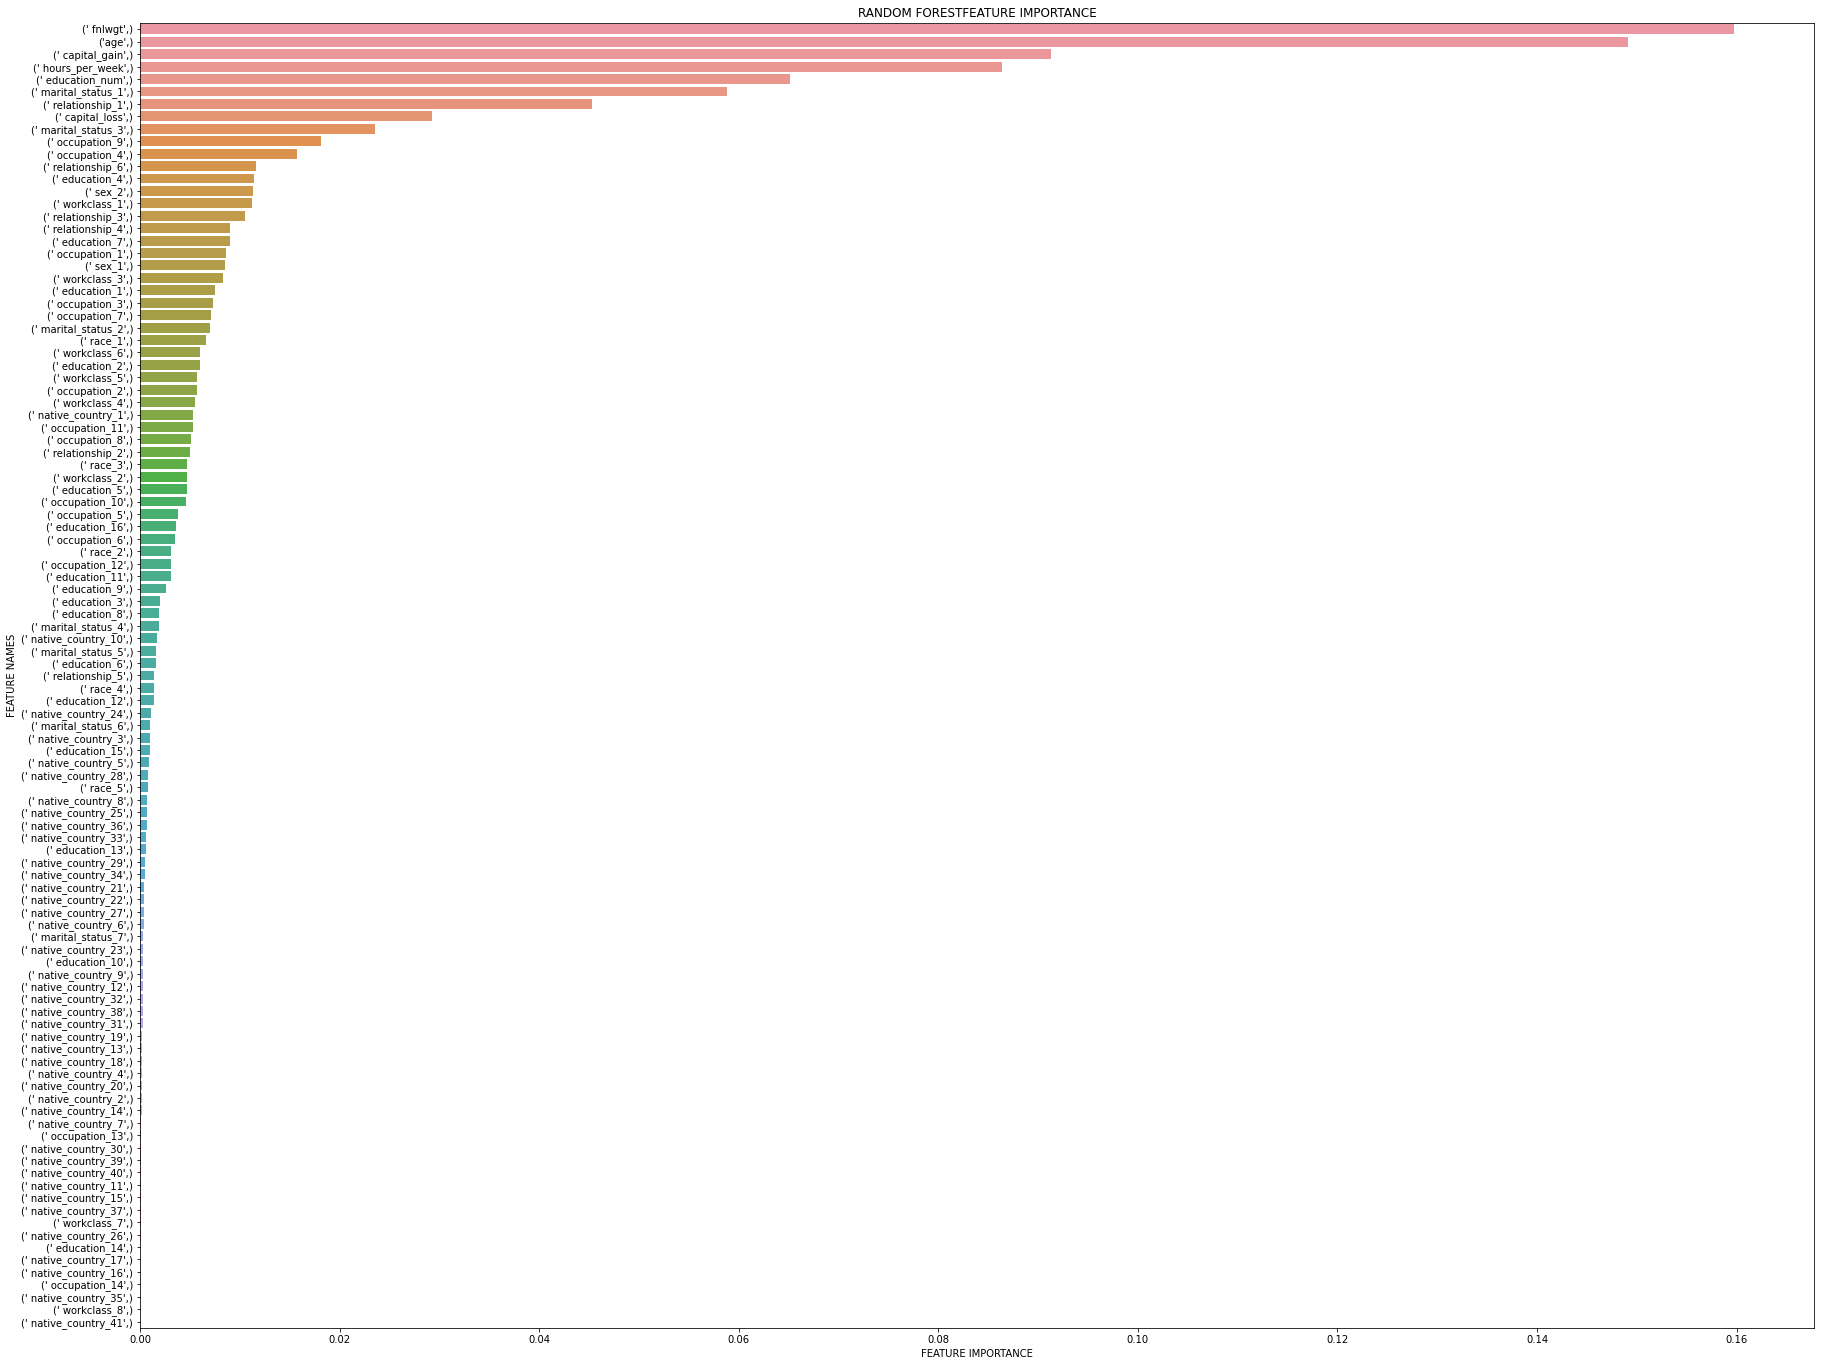

In [ ]:
plot_feature_importance(clf.feature_importances_,X_train.columns,'RANDOM FOREST')

#### Observation
- fnlwt , age ,weight are the most important features 
- native_country_41 is least important

### Build the Random Forest model on selected features ¶
- drop the least important feature native_country_41 from the model, rebuild the model and check its effect on accuracy.

In [ ]:
X_train = X_train.drop([' native_country_41'], axis=1)

X_test = X_test.drop([' native_country_41'], axis=1)

/usr/local/lib/python3.8/dist-packages/pandas/core/generic.py:4150: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


In [ ]:

clf = RandomForestClassifier(n_estimators=100, random_state=0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print('Model accuracy score with native_country_41 variable removed : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


Model accuracy score with native_country_41 variable removed : 0.8544


##### This shows that the accuracy has improved by dropping the native_country_41 column

### Confusion Mtrix

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

Confusion matrix

 [[6867  540]
 [ 882 1480]]


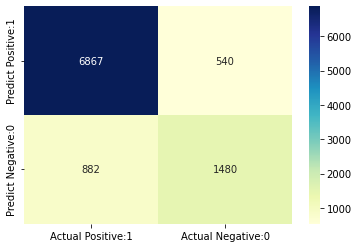

In [ ]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       <=50K       0.89      0.93      0.91      7407
        >50K       0.73      0.63      0.68      2362

    accuracy                           0.85      9769
   macro avg       0.81      0.78      0.79      9769
weighted avg       0.85      0.85      0.85      9769



### Conclusion:
- a Random Forest Classifier is used to predict the income of a person,two models were built, one with 10 decision-trees and another one with 100 decision-trees.
The model accuracy score with 10 decision-trees is 0.8446 but the same with 100 decision-trees is 0.8521. So, as expected accuracy increases with number of decision-trees in the model.
- Random Forest model feature imporatance and feature was used  to find only the important features, build the model using these features and see its effect on accuracy.
- removed the native_country_41 variable from the model, rebuild it and checked its accuracy. The accuracy of the model with native_country_41 variable removed is 0.8544. So, we can see that the model accuracy has improved with native_country_41 variable removed from the model.
- Confusion matrix and classification report are another tool to visualize the model performance. They yield good performance.